<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 3.02: Statistical Modeling and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow to produce the best model you can. In this lesson, you will follow all best practices when slicing your data and validating your model. 

## Imports

In [119]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!

import pandas as pd

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import ttest_ind


## Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [88]:
# Read in the citibike data in the data folder in this repository.
df_citibike = pd.read_csv('./data/citibike_feb2014.csv')

df_citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


## Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [89]:
##check data types

df_citibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Data columns (total 15 columns):
tripduration               224736 non-null int64
starttime                  224736 non-null object
stoptime                   224736 non-null object
start station id           224736 non-null int64
start station name         224736 non-null object
start station latitude     224736 non-null float64
start station longitude    224736 non-null float64
end station id             224736 non-null int64
end station name           224736 non-null object
end station latitude       224736 non-null float64
end station longitude      224736 non-null float64
bikeid                     224736 non-null int64
usertype                   224736 non-null object
birth year                 224736 non-null object
gender                     224736 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 25.7+ MB


In [90]:
##describe all values

df_citibike.describe(include='all')

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
count,224736.000000,224736,224736,224736.000000,224736,224736.000000,224736.000000,224736.000000,224736,224736.000000,224736.000000,224736.000000,224736,224736,224736.000000
unique,NaN,204437,204781,NaN,329,NaN,NaN,NaN,329,NaN,NaN,NaN,2,78,NaN
top,NaN,2014-02-11 08:50:10,2014-02-25 08:47:55,NaN,Lafayette St & E 8 St,NaN,NaN,NaN,Lafayette St & E 8 St,NaN,NaN,NaN,Subscriber,1985,NaN
freq,NaN,7,6,NaN,2920,NaN,NaN,NaN,2622,NaN,NaN,NaN,218019,9305,NaN
mean,874.519810,NaN,NaN,439.203479,NaN,40.734366,-73.990386,440.741995,NaN,40.734221,-73.990521,18010.598222,NaN,NaN,1.154617
std,5486.092219,NaN,NaN,335.723861,NaN,0.019031,0.011853,341.497433,NaN,0.019048,0.011920,1987.769335,NaN,NaN,0.436592
min,60.000000,NaN,NaN,72.000000,NaN,40.680342,-74.017134,72.000000,NaN,40.680342,-74.017134,14529.000000,NaN,NaN,0.000000
25%,360.000000,NaN,NaN,305.000000,NaN,40.721854,-73.998522,305.000000,NaN,40.721816,-73.999061,16302.000000,NaN,NaN,1.000000
50%,544.000000,NaN,NaN,403.000000,NaN,40.736197,-73.990617,403.000000,NaN,40.735877,-73.990741,17975.000000,NaN,NaN,1.000000
75%,845.000000,NaN,NaN,490.000000,NaN,40.749156,-73.981918,488.000000,NaN,40.749013,-73.981948,19689.000000,NaN,NaN,1.000000


In [91]:
##check for nulls in numeric
df_citibike.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

## Is average trip duration different by gender?

Conduct a hypothesis test that checks whether or not the average trip duration is different for `gender=1` and `gender=2`. Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly!



H0: u1 = u2

Ha:  u1 != u2


In [127]:
x1 = df_citibike[df_citibike['gender'] == 1]['tripduration']
x2 = df_citibike[df_citibike['gender'] == 2]['tripduration']

ttest_ind(x1,
          x2)

Ttest_indResult(statistic=-5.929304472651931, pvalue=3.046762685660303e-09)

The p value is extremeley low. If p is lower than the a, then we reject the null hypothesis. There for we accept the alternative hypothesis. We can accpet that the average trip duration for gender =1 and gender = 2 are different. 

## What numeric columns shouldn't be treated as numeric?

**Answer:**


ID columns should never be treated as numeric columns. Start Station ID, End station ID and bike id. They are unique identifiers and are categorical variables. They arent continous and dont reperesent integers.


## Dummify the `start station id` Variable

In [93]:
df_citibike = pd.get_dummies(df_citibike,
                          columns=['start station id'],
                          drop_first=True)

## Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected).

- Note: you will need to clean the data a bit.

## Theres a string in there

In [94]:
df_citibike['birth year'].sort_values(ascending = False)

161082      \N
20757       \N
125890      \N
150054      \N
20792       \N
          ... 
124361    1899
177826    1899
125527    1899
25042     1899
220029    1899
Name: birth year, Length: 224736, dtype: object

In [95]:
df_citibike[df_citibike['birth year'] == '\\N'].shape

##6717

(6717, 342)

In [96]:
df_citibike.loc[df_citibike['birth year'] == '\\N','birth year'] = 0

In [97]:
df_citibike['birth year'].dtypes

dtype('O')

In [98]:
def birthyear(x):
    return 2014 - int(x)

In [99]:
df_citibike['age'] = df_citibike['birth year'].map(birthyear)

In [100]:
df_citibike['age'].value_counts()

29     9305
30     9139
31     8779
33     8208
28     8109
       ... 
104       4
97        3
87        2
93        1
101       1
Name: age, Length: 78, dtype: int64

In [101]:
df_citibike.drop(columns = 'birth year', axis = 1)

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2008,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002,age
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,0,23
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,35
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,0,0,0,0,0,0,0,0,0,66
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,0,0,0,0,0,0,0,0,0,33
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224731,848,2014-02-28 23:57:13,2014-03-01 00:11:21,Broadway & W 32 St,40.748549,-73.988084,432,E 7 St & Avenue A,40.726218,-73.983799,...,0,0,0,0,0,0,0,0,0,38
224732,1355,2014-02-28 23:57:55,2014-03-01 00:20:30,W 20 St & 8 Ave,40.743453,-74.000040,302,Avenue D & E 3 St,40.720828,-73.977932,...,0,0,0,0,0,0,0,0,0,29
224733,304,2014-02-28 23:58:17,2014-03-01 00:03:21,E 17 St & Broadway,40.737050,-73.990093,334,W 20 St & 7 Ave,40.742388,-73.997262,...,0,0,0,0,0,0,0,0,0,46
224734,308,2014-02-28 23:59:10,2014-03-01 00:04:18,S Portland Ave & Hanson Pl,40.685396,-73.974315,365,Fulton St & Grand Ave,40.682232,-73.961458,...,0,0,0,0,0,0,0,0,0,32


## Split your data into train/test data

Look at the size of your data. What is a good proportion for your split? **Justify your answer.**

Use the `tripduration` column as your `y` variable.

For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`. (Hint: You may find the Pandas `.drop()` method helpful here.)

**NOTE:** When doing your train/test split, please use random seed 123.

In [102]:
df_citibike = pd.get_dummies(df_citibike,
                          columns=['usertype'],
                          drop_first=True)



In [103]:
df_citibike

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002,age,usertype_Subscriber
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,23,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,35,1
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,0,0,0,0,0,0,0,0,66,1
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,0,0,0,0,0,0,0,0,33,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224731,848,2014-02-28 23:57:13,2014-03-01 00:11:21,Broadway & W 32 St,40.748549,-73.988084,432,E 7 St & Avenue A,40.726218,-73.983799,...,0,0,0,0,0,0,0,0,38,1
224732,1355,2014-02-28 23:57:55,2014-03-01 00:20:30,W 20 St & 8 Ave,40.743453,-74.000040,302,Avenue D & E 3 St,40.720828,-73.977932,...,0,0,0,0,0,0,0,0,29,1
224733,304,2014-02-28 23:58:17,2014-03-01 00:03:21,E 17 St & Broadway,40.737050,-73.990093,334,W 20 St & 7 Ave,40.742388,-73.997262,...,0,0,0,0,0,0,0,0,46,1
224734,308,2014-02-28 23:59:10,2014-03-01 00:04:18,S Portland Ave & Hanson Pl,40.685396,-73.974315,365,Fulton St & Grand Ave,40.682232,-73.961458,...,0,0,0,0,0,0,0,0,32,1


## Fit a Linear Regression model in `sklearn` predicting `tripduration`.

In [104]:
X = df_citibike.drop(columns = ['tripduration', 'birth year', 'bikeid',
                             'end station longitude', 'end station latitude',
                            'end station name', 'end station id',
                            'start station longitude', 'start station latitude',
                            'start station name', 'starttime', 'stoptime'])
y = df_citibike['tripduration']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.1,
                                                    random_state=42)

In [113]:
lr = LinearRegression()

# Step 2. Fit the model on the training data.
lr.fit(X_train, y_train)

# Step 3. Generate predictions.
preds = lr.predict(X_test)

## Evaluate your model
Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

In [114]:
print(f'MSE on testing set: {mean_squared_error(y_train, lr.predict(X_train))}')
print(f'MSE on training set: {mean_squared_error(y_test, preds)}')

MSE on testing set: 29036697.51820395
MSE on training set: 38551597.859463625


In [115]:
print(f'R^2 on testing set: {r2_score(y_train, lr.predict(X_train))}')
print(f'R^2 on training set: {r2_score(y_test, preds)}')

R^2 on testing set: 0.0041806098631909094
R^2 on training set: -0.00024969769783345086


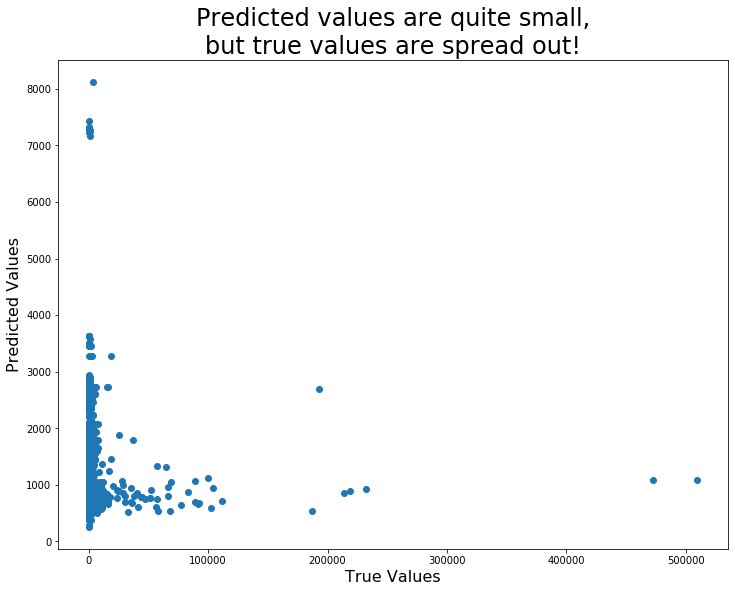

In [122]:
plt.figure(figsize = (12, 9))

# Examine the relationship between observed and predicted values.
plt.scatter(y_test, preds)

plt.plot()

plt.title('Predicted values are quite small,\nbut true values are spread out!', fontsize = 24)
plt.xlabel('True Values', fontsize = 16)
plt.ylabel('Predicted Values', fontsize = 16);

## Fit a Linear Regression model in `statsmodels` predicting `tripduration`.

In [120]:
X_train = sm.add_constant(X_train)

/Users/varunganti/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [123]:
model_stats = sm.OLS(y_train, X_train).fit()

## Using the `statsmodels` summary, test whether or not `age` has a significant effect when predicting `tripduration`.
- Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly **in the context of your model**!



H0 : Bage = 0

Ha: Bage != 0


assuming a  = .05

In [125]:
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.561
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           6.72e-47
Time:                        15:17:21   Log-Likelihood:            -2.0248e+06
No. Observations:              202262   AIC:                         4.050e+06
Df Residuals:                  201930   BIC:                         4.054e+06
Df Model:                         331                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7547.3031   2195.415     -3.438      0.001   -1.19e+04   -3244.342
gender                  164.5730     31.332      5.253      0.000     103.164     225.982
start station id_79      75.8283    314.810      0.241      0.810    -541.192     692.849
start station id_82     333.8096    396.882      0.841      0.400    -444.069    1111.688
start station id_83     -66.5057    395.831     -0.168      0.867    -842.324     709.313
start station id_116   -367.7993    268.049     -1.372      0.170    -893.169     157.571
start station id_119   -298.3153    779.451     -0.383      0.702   -1826.021    1229.390
start station id_120    873.6254    624.774      1.398      0.162    -350.917    2098.168
start station id_127   -274.4592    282.696     -0.971      0.332    -828.536     279.618
start station id_128   -291.3199    274.296     -1.062      0.288    -828.934     246.294
start station id_137   -256.3029    333.749     -0.768      0.443    -910.443     397.838
start station id_143   -260.7652    483.134     -0.540      0.589   -1207.696     686.165
start station id_144    -62.6192    641.668     -0.098      0.922   -1320.274    1195.035
start station id_146   -401.2148    331.332     -1.211      0.226   -1050.617     248.187
start station id_147    -37.5647    286.812     -0.131      0.896    -599.709     524.579
start station id_150    147.4152    326.473      0.452      0.652    -492.464     787.294
start station id_151   -303.5954    257.599     -1.179      0.239    -808.483     201.292
start station id_152   -336.2215    362.294     -0.928      0.353   -1046.309     373.866
start station id_153   -253.1464    282.205     -0.897      0.370    -806.262     299.969
start station id_157    111.8891    386.207      0.290      0.772    -645.067     868.845
start station id_160   -121.7176    315.803     -0.385      0.700    -740.684     497.249
start station id_161   -346.6561    273.544     -1.267      0.205    -882.795     189.483
start station id_164   -195.8330    313.276     -0.625      0.532    -809.845     418.179
start station id_167   -206.0687    285.779     -0.721      0.471    -766.189     354.052
start station id_168   -256.9067    268.493     -0.957      0.339    -783.146     269.333
start station id_173   -299.7130    285.237     -1.051      0.293    -858.770     259.344
start station id_174    342.7788    297.312      1.153      0.249    -239.945     925.502
start station id_195    294.5534    306.879      0.960      0.337    -306.922     896.029
start station id_212   -200.5106    282.136     -0.711      0.477    -753.491     352.470
start station id_216   -143.5270    699.177     -0.205      0.837   -1513.897    1226.843
start station id_217   -120.0490    515.594     -0.233      0.816   -1130.600     890.502
start station id_218   

##P value for age is less than a of .05. 
##Therefore can accept the alternative hypothesis that age is a solid predictor for trip duration

## Citi Bike is attempting to market to people who they think will ride their bike for a long time. Based on your modeling, what types of individuals should Citi Bike market toward?

When looking at age versus trip duration we see that as age increases trip duration increases. The age coef is 
4.6498 which means as it increases the trip duration will increase by 4.7 minutes. We proved with our null hypothesis test that age is a good predictor of trip duration. So we could market it to older age people. 